In [1]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Choose a mean,standard deviation, and number of samples

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [3]:
sample_ages = create_ages()

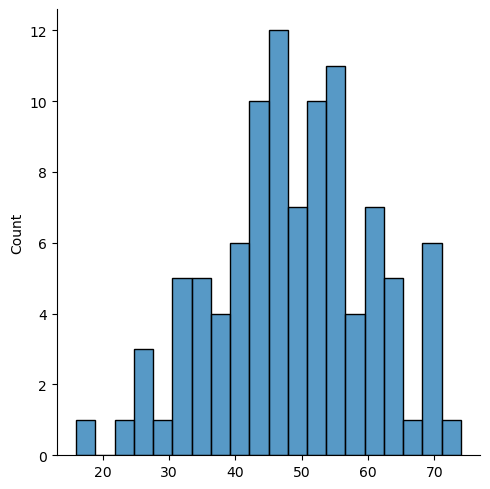

In [4]:
# lets check for weird  data with hist 

sns.displot(sample_ages , bins= 20)

<Axes: >

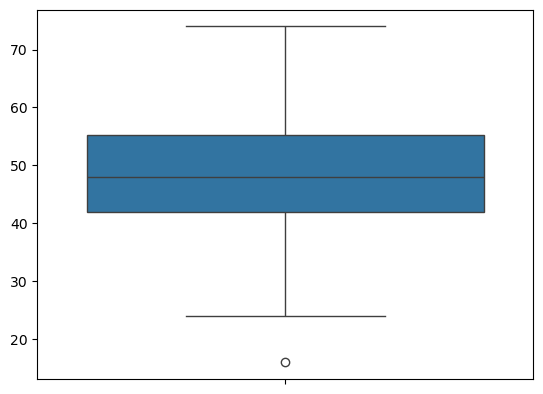

In [5]:
# box plot 

sns.boxplot(sample_ages)

In [6]:
ser = pd.Series(sample_ages)

ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [7]:
# leys check the IQR

IQR =  55.25000 - 42.0 

lower_lim = 42.0 -1.5*(IQR)



In [8]:
# use this lowe_lim to get rip off  outliers
lower_lim 

22.125

In [9]:
# practice with real data
df = pd.read_csv("/home/jdiego/Documentos/MACHINE_LEARNING_DATA_SCIENCE/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Ames_Housing_Data.csv")

In [10]:
# lets check the correlation between each of the features with respect the sales price

df.corr(numeric_only=True)["SalePrice"].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

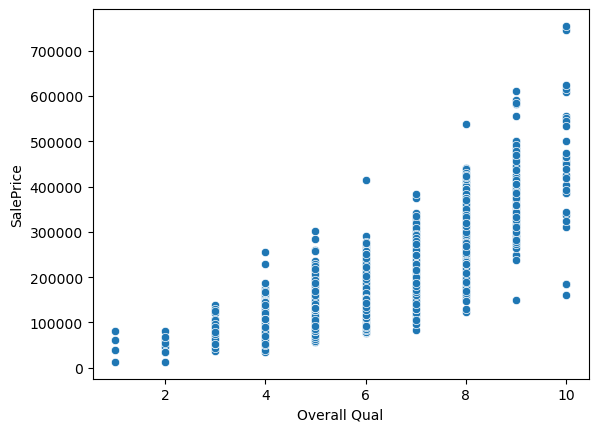

In [11]:
sns.scatterplot(x= "Overall Qual" , y ="SalePrice" , data=df)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

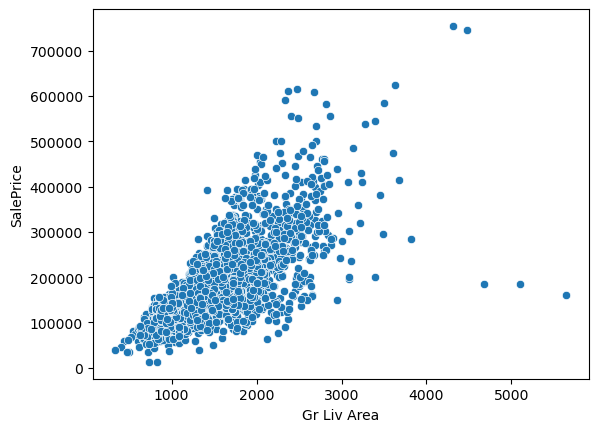

In [12]:
sns.scatterplot(x= "Gr Liv Area" , y ="SalePrice" , data=df)

In [13]:
df[(df["Overall Qual"]>8) & (df["SalePrice"]<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [14]:
drop_ind= df[(df["Gr Liv Area"]>4000) & (df["SalePrice"]<400000)].index

In [15]:
df = df.drop(drop_ind, axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

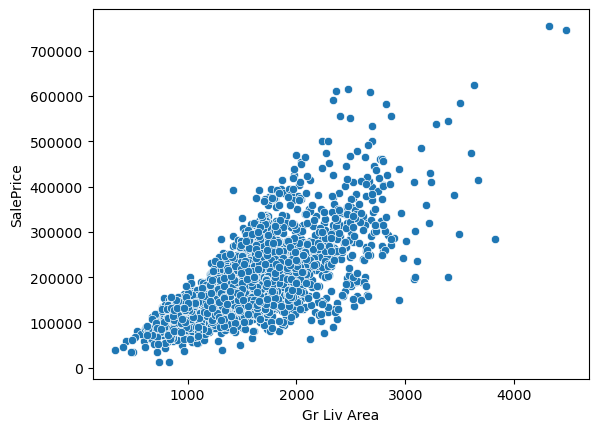

In [16]:
sns.scatterplot(x= "Gr Liv Area" , y ="SalePrice" , data=df)

# STEP 1: check how much data is missing 

In [17]:
with open ("/home/jdiego/Documentos/MACHINE_LEARNING_DATA_SCIENCE/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Ames_Housing_Feature_Description.txt","r") as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [18]:
df1 = pd.read_csv("/home/jdiego/Documentos/MACHINE_LEARNING_DATA_SCIENCE/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Ames_outliers_removed.csv")

In [19]:
df1.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [20]:
# drop the id 
df1 = df1.drop("PID", axis=1)

In [21]:
df.isnull().sum()  # how many rows are missing values for all features 

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [22]:
# lets check the percentage of how much it is missing 

def missing_percentage (df): 
    "returns percetnage of missing data"

    per = 100*df.isnull().sum()/len(df)

    per_m = per[per > 0].sort_values()

    return (per_m)

miss_per = missing_percentage(df1)

In [23]:
miss_per

Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 2       0.034165
Electrical         0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Finish      5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

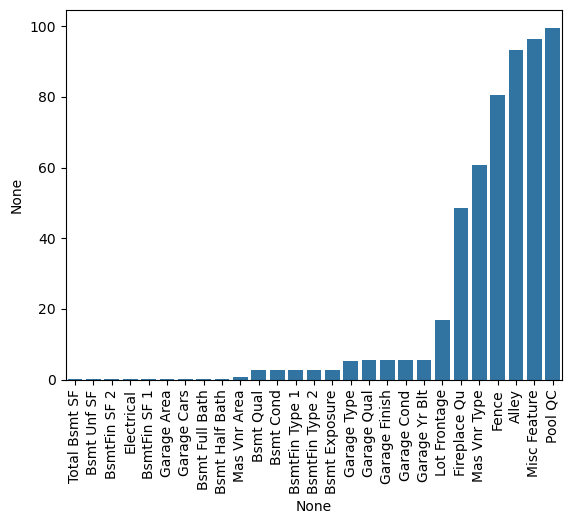

In [24]:
# lets use a bar plot 

sns.barplot(x=miss_per.index , y=miss_per )
plt.xticks(rotation=90);

# STEP 2 : filling or dropping data on rows

(0.0, 1.0)

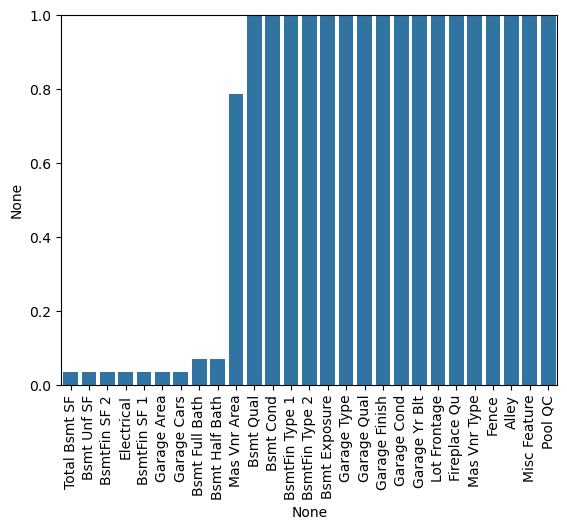

In [25]:

sns.barplot(x=miss_per.index , y=miss_per )
plt.xticks(rotation=90);
plt.ylim(0,1)

In [26]:
# check missing information 
miss_per[miss_per < 1]

Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [27]:
df1[df1["Electrical"].isnull()]["Garage Area"]

1576    400.0
Name: Garage Area, dtype: float64

In [28]:
df1[df1["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [29]:
# lets drop rows with no info 

df1 = df1.dropna(axis=0 , subset=["Electrical" , "Garage Cars"])

In [30]:
miss_per1 = missing_percentage(df1)

miss_per1[miss_per1<1]

Total Bsmt SF     0.034188
Bsmt Unf SF       0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

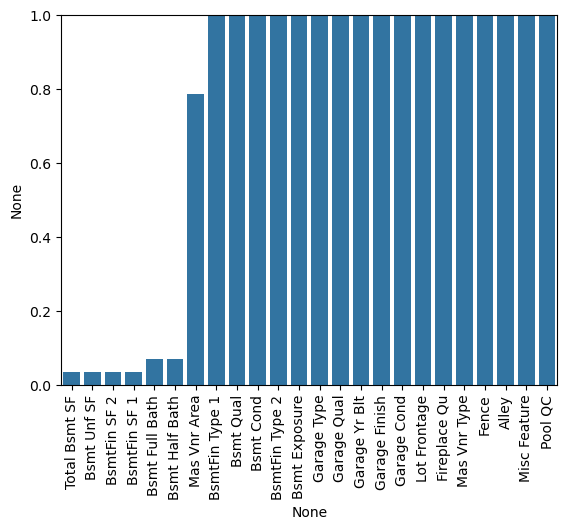

In [31]:
sns.barplot(x=miss_per1.index , y=miss_per1 )
plt.xticks(rotation=90)
plt.ylim(0,1)

In [32]:
df1[df1["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [33]:
df1[df1["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [34]:
df1[df1["Bsmt Unf SF"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [35]:
# lets replace NAN values 

# BSMT NUMERIC COLUMNS --> fill nan with 0 

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df1[bsmt_num_cols] = df1[bsmt_num_cols].fillna(0)

# BSMT STRING COLUMNS --> fill nan with "none"

bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df1[bsmt_str_cols] = df1[bsmt_str_cols].fillna('None')

(0.0, 1.0)

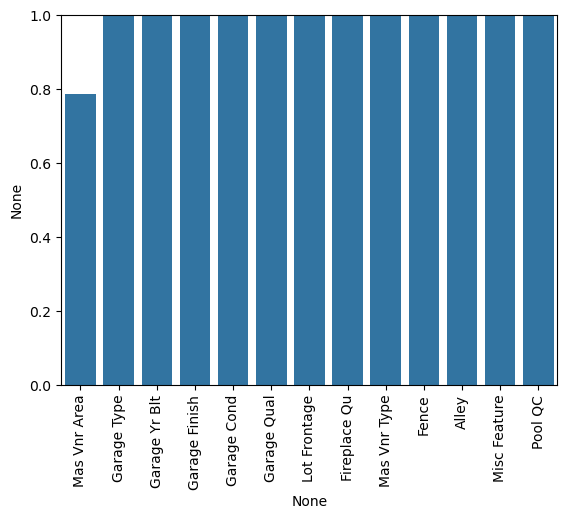

In [36]:
miss_per1 = missing_percentage(df1)


sns.barplot(x=miss_per1.index , y=miss_per1 )
plt.xticks(rotation=90)
plt.ylim(0,1)

In [37]:
df1["Mas Vnr Type"] = df1["Mas Vnr Type"].fillna("None")
df1["Mas Vnr Area"] = df1["Mas Vnr Area"].fillna(0)

In [39]:
percent_nan = missing_percentage(df1)

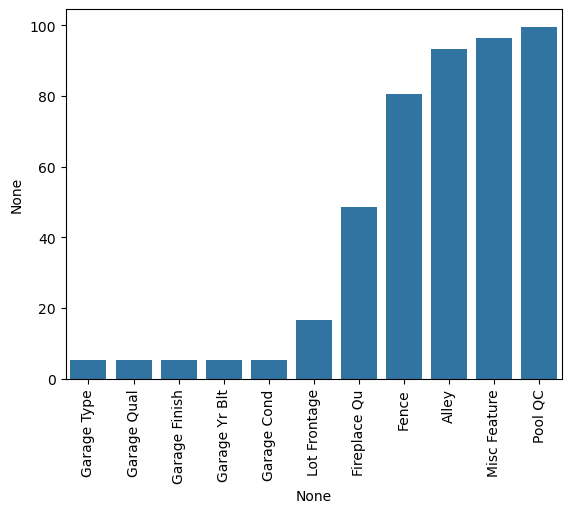

In [40]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# STEP 3 : Deciding how to drop or fill up data on columns 

In [41]:
df1[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [42]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df1[gar_str_cols] = df1[gar_str_cols].fillna('None')

In [44]:
df1['Garage Yr Blt'] = df1['Garage Yr Blt'].fillna(0)
percent_nan = missing_percentage(df1)

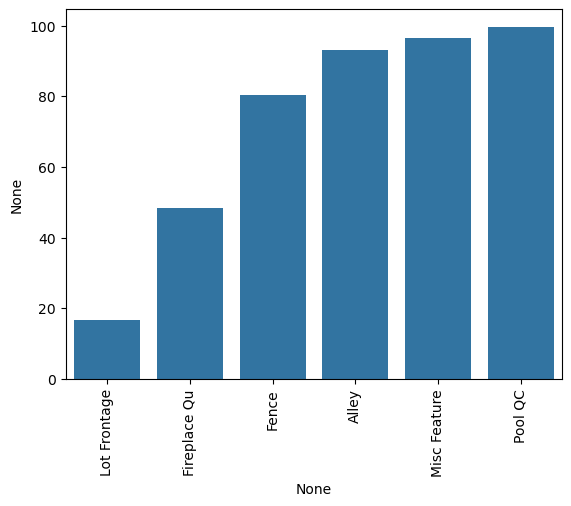

In [45]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

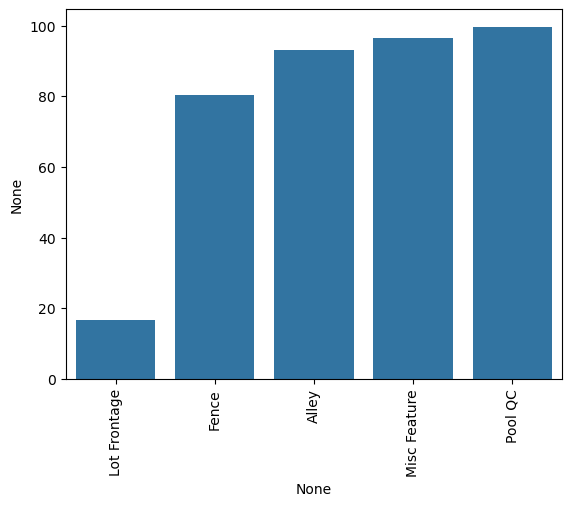

In [46]:
df1['Fireplace Qu'] = df1['Fireplace Qu'].fillna("None")

percent_nan = missing_percentage(df1)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

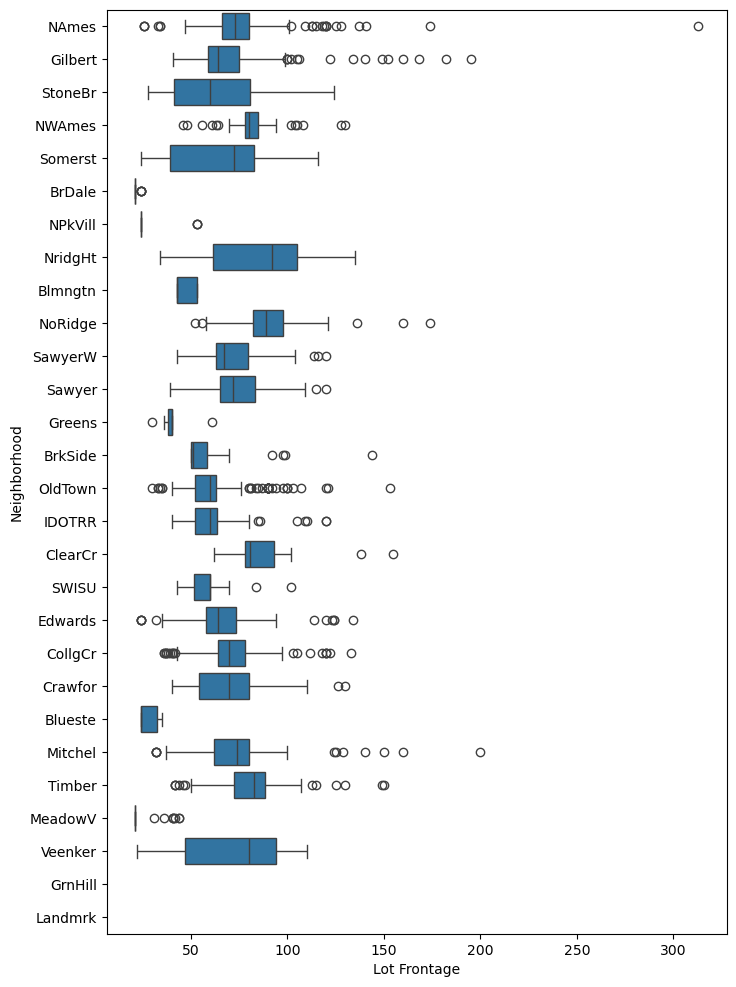

In [48]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df1,orient='h')

In [52]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.241379
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [55]:
df1['Lot Frontage'] = df1.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [56]:
df1['Lot Frontage'] = df1['Lot Frontage'].fillna(0)

# STEP 4 : CATEGORICAL DATA 

In [57]:
df2  = pd.read_csv("/home/jdiego/Documentos/MACHINE_LEARNING_DATA_SCIENCE/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Ames_NO_Missing_Data.csv")

In [58]:
df2.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [59]:
df["MS SubClass"] = df["MS SubClass"].apply(str)

In [60]:
# create dummy variables

directions =pd.Series(["Up" , "Up" , "Down"])

In [62]:
pd.get_dummies(directions, drop_first=True)

,Up
0,True
1,True
2,False


In [71]:
my_object_df = df.select_dtypes(include="object")

my_numeric_df = df.select_dtypes(exclude="object")

In [72]:
df_objects_dummies = pd.get_dummies(my_object_df, drop_first=True) 

In [73]:
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2926,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2927,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2928,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [74]:
final_df = pd.concat([my_numeric_df, df_objects_dummies], axis=1)

In [75]:
final_df

,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,526350040,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
2,526351010,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,526353030,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,527105010,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2926,923276100,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,...,False,False,False,False,True,False,False,False,True,False
2927,923400125,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2928,924100070,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,False,False,False,False,True,False,False,False,True,False


In [76]:
final_df.corr()["SalePrice"].sort_values()

Exter Qual_TA        -0.591461
Kitchen Qual_TA      -0.527069
Bsmt Qual_TA         -0.452725
Garage Finish_Unf    -0.422088
Garage Type_Detchd   -0.365182
                        ...   
Garage Cars           0.648457
Total Bsmt SF         0.660607
Gr Liv Area           0.727122
Overall Qual          0.802592
SalePrice             1.000000
Name: SalePrice, Length: 274, dtype: float64